In [ ]:
# Another example
# Using  Kaggle's Adult dataseet
# https://www.kaggle.com/datasets/qizarafzaal/adult-dataset
# https://www.kaggle.com/code/prashant111/naive-bayes-classifier-in-python/notebook

In [ ]:
#clear all variables (from last session)
import sys
sys.modules[__name__].__dict__.clear()
import time, random, itertools, shutil
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [ ]:
import numpy  # linear algebra
import pandas # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization purposes
import seaborn  # for statistical data visualization
%matplotlib inline

In [ ]:
source = "https://raw.githubusercontent.com/realtechsupport/CriticalMachineLearning/main/various_datasets/adult.csv"
# Load data as a dataframe
dataframe = pandas.read_csv(source, header=None,  sep="[;,]", engine='python')

In [ ]:
print(dataframe.shape)
pandas.set_option('expand_frame_repr', False)
print(dataframe.head())

(32561, 15)
   0                  1       2           3   4                    5                   6               7       8        9     10  11  12              13      14
0  39          State-gov   77516   Bachelors  13        Never-married        Adm-clerical   Not-in-family   White     Male  2174   0  40   United-States   <=50K
1  50   Self-emp-not-inc   83311   Bachelors  13   Married-civ-spouse     Exec-managerial         Husband   White     Male     0   0  13   United-States   <=50K
2  38            Private  215646     HS-grad   9             Divorced   Handlers-cleaners   Not-in-family   White     Male     0   0  40   United-States   <=50K
3  53            Private  234721        11th   7   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male     0   0  40   United-States   <=50K
4  28            Private  338409   Bachelors  13   Married-civ-spouse      Prof-specialty            Wife   Black   Female     0   0  40            Cuba   <=50K


In [ ]:
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship','race', 'gender', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

dataframe.columns = col_names

print(dataframe.columns)

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'gender',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')


In [ ]:
print(dataframe.head())

   age          workclass  fnlwgt   education  education_num       marital_status          occupation    relationship    race   gender  capital_gain  capital_loss  hours_per_week  native_country  income
0   39          State-gov   77516   Bachelors             13        Never-married        Adm-clerical   Not-in-family   White     Male          2174             0              40   United-States   <=50K
1   50   Self-emp-not-inc   83311   Bachelors             13   Married-civ-spouse     Exec-managerial         Husband   White     Male             0             0              13   United-States   <=50K
2   38            Private  215646     HS-grad              9             Divorced   Handlers-cleaners   Not-in-family   White     Male             0             0              40   United-States   <=50K
3   53            Private  234721        11th              7   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male             0             0              40   United-

In [ ]:
# find categorical variables

categorical = [var for var in dataframe.columns if dataframe[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :\n\n', categorical)

There are 9 categorical variables

The categorical variables are :

 ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'gender', 'native_country', 'income']


In [ ]:
print(dataframe[categorical].head())

           workclass   education       marital_status          occupation    relationship    race   gender  native_country  income
0          State-gov   Bachelors        Never-married        Adm-clerical   Not-in-family   White     Male   United-States   <=50K
1   Self-emp-not-inc   Bachelors   Married-civ-spouse     Exec-managerial         Husband   White     Male   United-States   <=50K
2            Private     HS-grad             Divorced   Handlers-cleaners   Not-in-family   White     Male   United-States   <=50K
3            Private        11th   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   United-States   <=50K
4            Private   Bachelors   Married-civ-spouse      Prof-specialty            Wife   Black   Female            Cuba   <=50K


In [ ]:
# view frequency distribution of categorical variables
for var in categorical:
    print(dataframe[var].value_counts()/numpy.float(len(dataframe)))

 Private             0.697030
 Self-emp-not-inc    0.078038
 Local-gov           0.064279
 ?                   0.056386
 State-gov           0.039864
 Self-emp-inc        0.034274
 Federal-gov         0.029483
 Without-pay         0.000430
 Never-worked        0.000215
Name: workclass, dtype: float64
 HS-grad         0.322502
 Some-college    0.223918
 Bachelors       0.164461
 Masters         0.052916
 Assoc-voc       0.042443
 11th            0.036086
 Assoc-acdm      0.032769
 10th            0.028654
 7th-8th         0.019840
 Prof-school     0.017690
 9th             0.015786
 12th            0.013298
 Doctorate       0.012684
 5th-6th         0.010227
 1st-4th         0.005160
 Preschool       0.001566
Name: education, dtype: float64
 Married-civ-spouse       0.459937
 Never-married            0.328092
 Divorced                 0.136452
 Separated                0.031479
 Widowed                  0.030497
 Married-spouse-absent    0.012837
 Married-AF-spouse        0.000706
Name:

In [ ]:
print(dataframe.workclass.value_counts())

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64


In [ ]:
# there are some bogus entries in the workclass
# replace '?' values in workclass variable with `NaN`
#dataframe['workclass'].replace({'?': numpy.NaN}, inplace=True)

import re
pattern = re.compile(r'\?')

dataframe['workclass'].replace(pattern, numpy.nan, regex=True, inplace=True)
print(dataframe.workclass.value_counts())

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64


In [ ]:
dataframe['occupation'].replace(pattern, numpy.nan, regex=True, inplace=True)
print(dataframe.occupation.value_counts())

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64


In [ ]:
dataframe['native_country'].replace(pattern, numpy.nan, regex=True, inplace=True)
print(dataframe.native_country.value_counts())

 United-States                 29170
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 France                           29
 

In [ ]:
#Only two categories for income
print(dataframe['income'].head())

0     <=50K
1     <=50K
2     <=50K
3     <=50K
4     <=50K
Name: income, dtype: object


In [ ]:
print(dataframe[categorical].isnull().sum())
# workclass, occupation and native_country variable contains missing values

workclass         1836
education            0
marital_status       0
occupation        1843
relationship         0
race                 0
gender               0
native_country     583
income               0
dtype: int64


In [ ]:
#check cardinality
for var in categorical:
    print(var, ' contains ', len(dataframe[var].unique()), ' labels')

workclass  contains  9  labels
education  contains  16  labels
marital_status  contains  7  labels
occupation  contains  15  labels
relationship  contains  6  labels
race  contains  5  labels
gender  contains  2  labels
native_country  contains  42  labels
income  contains  2  labels


In [ ]:
# find numerical variables

numerical = [var for var in dataframe.columns if dataframe[var].dtype!='O']
print('There are {} numerical variables\n'.format(len(numerical)))
print('The numerical variables are :', numerical)

There are 6 numerical variables

The numerical variables are : ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


In [ ]:
# check missing values in numerical variables
print(dataframe[numerical].isnull().sum())

age               0
fnlwgt            0
education_num     0
capital_gain      0
capital_loss      0
hours_per_week    0
dtype: int64


In [ ]:
#---------------------------------------------

In [ ]:
#define feature vector and target variable
X = dataframe.drop(['income'], axis=1)
y = dataframe['income']

Basic steps of data preparation: training versus testing sets
image source: https://www.datacamp.com/tutorial/naive-bayes-scikit-learn

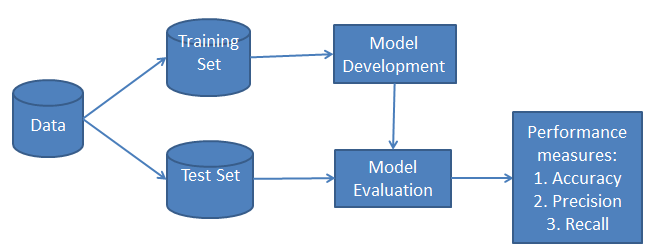

In [ ]:
## split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

print(X_train.shape, X_test.shape)

(22792, 14) (9769, 14)


In [ ]:
# do some guessing regarding missing values (feature engineering)
# print categorical variables with missing data

numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']
categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

print(numerical)
print(categorical)
print(X_train[categorical].isnull().mean())

for col in categorical:
    if X_train[col].isnull().mean()>0:
        print(col, (X_train[col].isnull().mean()))

['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']
['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'gender', 'native_country']
workclass         0.055985
education         0.000000
marital_status    0.000000
occupation        0.056072
relationship      0.000000
race              0.000000
gender            0.000000
native_country    0.018164
dtype: float64
workclass 0.055984555984555984
occupation 0.05607230607230607
native_country 0.018164268164268166


In [ ]:
# impute missing categorical variables with most frequent value

for df2 in [X_train, X_test]:
    df2['workclass'].fillna(X_train['workclass'].mode()[0], inplace=True)
    df2['occupation'].fillna(X_train['occupation'].mode()[0], inplace=True)
    df2['native_country'].fillna(X_train['native_country'].mode()[0], inplace=True)

In [ ]:
# check missing values in the training set
print(X_train[categorical].isnull().sum())

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
gender            0
native_country    0
dtype: int64


In [ ]:
# check missing values in the test set
print(X_test[categorical].isnull().sum())

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
gender            0
native_country    0
dtype: int64


In [ ]:
# check missing values in X_train
print(X_train.isnull().sum())

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
gender            0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64


In [ ]:
# check missing values in X_test
print(X_test.isnull().sum())

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
gender            0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64


In [ ]:
# check the training data of type categorical
print(X_train[categorical].head())

        workclass      education       marital_status     occupation    relationship    race   gender  native_country
32098     Private        HS-grad   Married-civ-spouse   Craft-repair         Husband   White     Male   United-States
25206   State-gov        HS-grad             Divorced   Adm-clerical       Unmarried   White   Female   United-States
23491     Private   Some-college   Married-civ-spouse          Sales         Husband   White     Male   United-States
12367     Private        HS-grad        Never-married   Craft-repair   Not-in-family   White     Male       Guatemala
7054      Private        7th-8th        Never-married   Craft-repair   Not-in-family   White     Male         Germany


In [ ]:
!pip install category-encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.9 MB/s eta 0:00:00


In [ ]:
# import category encoders
import category_encoders as ce

encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'gender', 'native_country'])

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

Here is a short description, with code,  of category encoding and inverting the encoding:

https://stackoverflow.com/questions/58217005/how-to-reverse-label-encoder-from-sklearn-for-multiple-columns

In [ ]:
print(X_train.head())

       age  workclass_1  workclass_2  workclass_3  workclass_4  workclass_5  workclass_6  workclass_7  workclass_8  fnlwgt  ...  native_country_32  native_country_33  native_country_34  native_country_35  native_country_36  native_country_37  native_country_38  native_country_39  native_country_40  native_country_41
32098   45            1            0            0            0            0            0            0            0  170871  ...                  0                  0                  0                  0                  0                  0                  0                  0                  0                  0
25206   47            0            1            0            0            0            0            0            0  108890  ...                  0                  0                  0                  0                  0                  0                  0                  0                  0                  0
23491   48            1            0          

In [ ]:
print(X_train.shape)

(22792, 105)


In [ ]:
print(X_test.head())

       age  workclass_1  workclass_2  workclass_3  workclass_4  workclass_5  workclass_6  workclass_7  workclass_8  fnlwgt  ...  native_country_32  native_country_33  native_country_34  native_country_35  native_country_36  native_country_37  native_country_38  native_country_39  native_country_40  native_country_41
22278   27            1            0            0            0            0            0            0            0  177119  ...                  0                  0                  0                  0                  0                  0                  0                  0                  0                  0
8950    27            1            0            0            0            0            0            0            0  216481  ...                  0                  0                  0                  0                  0                  0                  0                  0                  0                  0
7838    25            1            0          

In [ ]:
print(X_test.shape)

(9769, 105)


In [ ]:
# now we use feature scaling -------------------------------------------

In [ ]:
from sklearn.preprocessing import RobustScaler

cols = X_train.columns
scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
print(X_train.head())

    age workclass_1 workclass_2 workclass_3 workclass_4 workclass_5 workclass_6 workclass_7 workclass_8    fnlwgt  ... native_country_32 native_country_33 native_country_34 native_country_35 native_country_36 native_country_37 native_country_38 native_country_39 native_country_40 native_country_41
0  0.40         0.0         0.0         0.0         0.0         0.0         0.0         0.0         0.0 -0.058906  ...               0.0               0.0               0.0               0.0               0.0               0.0               0.0               0.0               0.0               0.0
1  0.50        -1.0         1.0         0.0         0.0         0.0         0.0         0.0         0.0 -0.578076  ...               0.0               0.0               0.0               0.0               0.0               0.0               0.0               0.0               0.0               0.0
2  0.55         0.0         0.0         0.0         0.0         0.0         0.0         0.0         0.0

In [ ]:
print(X_test.head())

    age workclass_1 workclass_2 workclass_3 workclass_4 workclass_5 workclass_6 workclass_7 workclass_8    fnlwgt  ... native_country_32 native_country_33 native_country_34 native_country_35 native_country_36 native_country_37 native_country_38 native_country_39 native_country_40 native_country_41
0 -0.50         0.0         0.0         0.0         0.0         0.0         0.0         0.0         0.0 -0.006571  ...               0.0               0.0               0.0               0.0               0.0               0.0               0.0               0.0               0.0               0.0
1 -0.50         0.0         0.0         0.0         0.0         0.0         0.0         0.0         0.0  0.323136  ...               0.0               0.0               0.0               0.0               0.0               0.0               0.0               0.0               0.0               0.0
2 -0.60         0.0         0.0         0.0         0.0         0.0         0.0         0.0         0.0

In [ ]:
X_train = pandas.DataFrame(X_train, columns=[cols])
X_test = pandas.DataFrame(X_test, columns=[cols])


In [ ]:
# FINALLY model training
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB

# instantiate the model
gnb = GaussianNB()

# fit the model
gnb.fit(X_train, y_train)
print()

In [ ]:
# Predict
y_pred = gnb.predict(X_test)
print(y_pred)

[' <=50K' ' <=50K' ' >50K' ... ' >50K' ' <=50K' ' <=50K']


In [ ]:
print(X_test.shape)
print(X_test.iloc[0]['age'])
#y_pred_0 = gnb.predict(X_test.iloc[0]['age'])
#print(y_pred_0)

(9769, 105)
-0.5


In [ ]:
# check the accuracy of the trained model
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.8083


In [ ]:
# compare with the test set
y_pred_train = gnb.predict(X_train)
print(y_pred_train)
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

[' >50K' ' <=50K' ' >50K' ... ' <=50K' ' >50K' ' <=50K']
Model accuracy score: 0.8067


In [ ]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[5999 1408]
 [ 465 1897]]

True Positives(TP) =  5999

True Negatives(TN) =  1897

False Positives(FP) =  1408

False Negatives(FN) =  465


In [ ]:
#Class probabilities (10 of them)
y_pred_prob = gnb.predict_proba(X_test)[0:10]
print(y_pred_prob)

[[9.99999426e-01 5.74152436e-07]
 [9.99687907e-01 3.12093456e-04]
 [1.54405602e-01 8.45594398e-01]
 [1.73624321e-04 9.99826376e-01]
 [8.20121011e-09 9.99999992e-01]
 [8.76844580e-01 1.23155420e-01]
 [9.99999927e-01 7.32876705e-08]
 [9.99993460e-01 6.53998797e-06]
 [9.87738143e-01 1.22618575e-02]
 [9.99999996e-01 4.01886317e-09]]


In [ ]:
# get classification metrics
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.93      0.81      0.86      7407
        >50K       0.57      0.80      0.67      2362

    accuracy                           0.81      9769
   macro avg       0.75      0.81      0.77      9769
weighted avg       0.84      0.81      0.82      9769



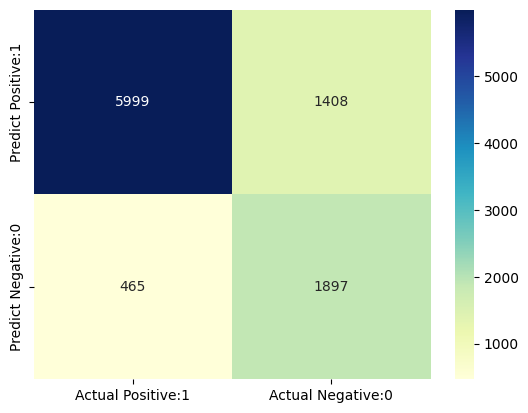

In [ ]:
cm_matrix = pandas.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], index=['Predict Positive:1', 'Predict Negative:0'])
seaborn.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
print()